# Udacity Data Analyst Nanodegree - Project 5: `Pisa2012` Results Analysis - 
# Exploratory and Explanatory Data Visualisation,  by Dyke Ferber
---

## `Explanatory Data Analysis Slidedeck`

<a id='import_lib'></a>
### I. Import libraries
---
Import the required libraries. We will use pandas, seaborn and matplotlib for data visualisations, numpy for some statistical computing, zipfile to extract the initial .zip file downloaded from Udacity and plot inline with the magic % command.

In [19]:
import numpy as np
import pprint
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import os

%matplotlib inline
%config InlineBackend.figure_format = "retina"

plt.style.use("seaborn")

In [20]:
# copied from https://stackoverflow.com/questions/21971449/how-do-i-increase-the-cell-width-of-the-jupyter-ipython-notebook-in-my-browser
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

<a id='import_data'></a>
### II. Import the dataset
---
Import the cleaned pisa dataframe that was prepared in the `exploratory_data_analysis.ipynb`.

In [21]:
pisa = pd.read_csv("pisa_cleaned_df.csv")

<a id='Tasks'></a>
### III. What we will focus on in this notebook

### The `PISA 2012` dataset: A brief introduction
---
The PISA survey (Programme for International Student Assessment) is an international survey dedicated to compare the level of educational fitness of school students around the age of 15 years that are about to graduate. Therein, PISA does not aim to assess theoretical knowledge in different domains like biology, chemistry and languages, however asks how well the teenagers can apply what they have learned throughout their school time to real-world situations.  
The dataset we used here contains the full results from 2012. It holds 485489 entries (observations) and  635 features (variables). It is therefore an extraordinarily large dataset and we will therefore reduce it in order to answer some key questions in this dataset.  

While many other Udacity Students followed the most obvious question, wheter the amount of time and effort spend learning correlates to overall good test results, I herein want to ask 2 key questions. 1: wether the financial situation at home has anything to do with the outcome in the test statistics, and 2. if students that regularly skip school perform worse (I almost never skipped lessons and wonder if I should have done this in order to sometimes evade some boring hours without sacrifying my test performance) ... 

## Research Questions in this Notebook:
`1. Is there a potential impact of the financial situation on a students test outcome or vice versa ?`  
`2. Is beeing late for school and skipping school lessons bad for your test performance ?`  
`(3. Additional) What countries perform best ? How is Germany performing ? Is it as bad as we think ?`  

## Research question 1:
`1. Is there a potential impact of the financial situation on a students test outcome or vice versa ?`  

We will start by having a look a the overall distribution of items, in detail whether a student possesses items like computers, internet, literature, art/poetry books etc to see if there might be any bias in the distribution that might later affect our analyses on the correlation with the global test results.

As the lists we created in our exploratory notebook are not stored we quickly recreate them. Then we will set up a barchart that counts the number of time a student crossed "Yes" or "No" for each item in our possessions list.

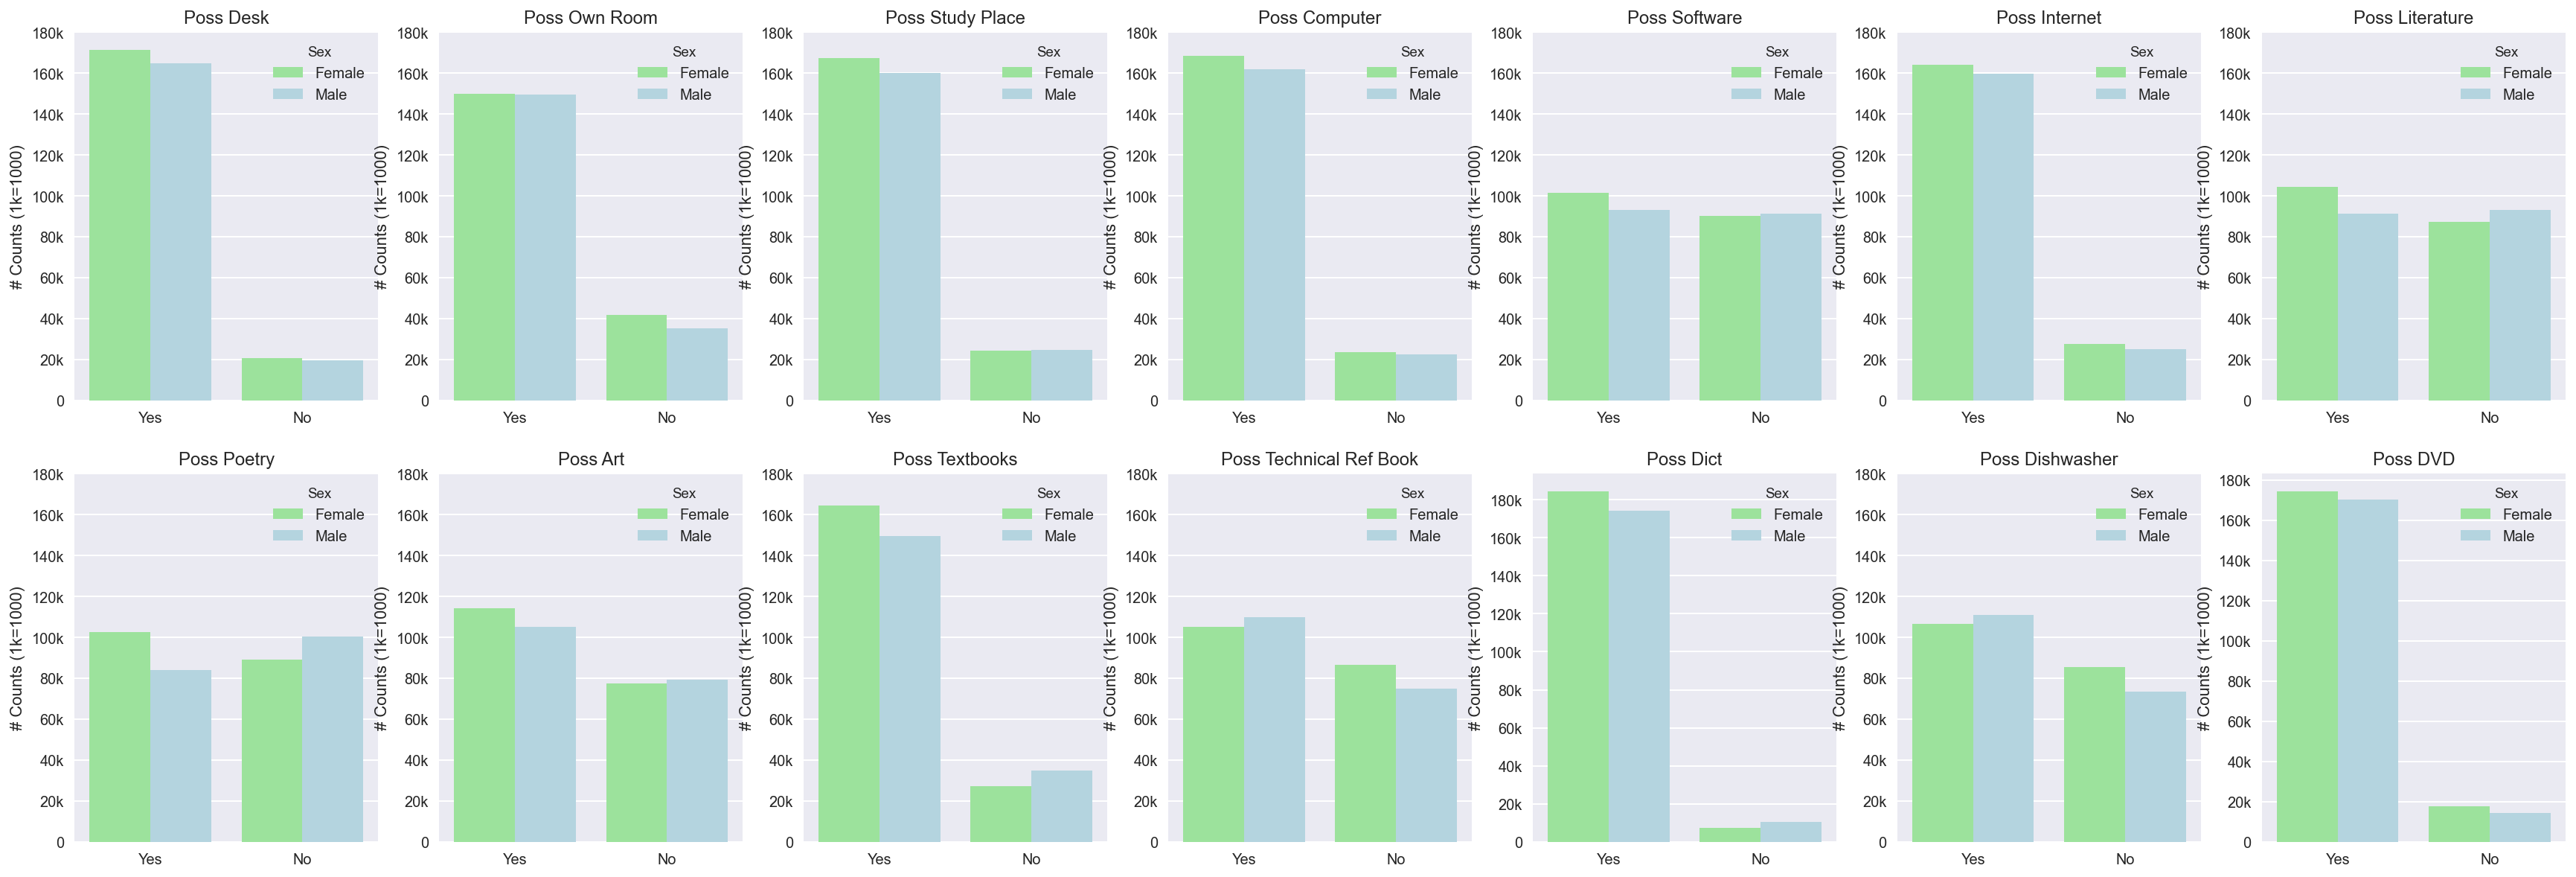

In [22]:
possessions = ['Poss_Desk', 'Poss_Own_Room', 'Poss_Study_Place', 'Poss_Computer',
               'Poss_Software', 'Poss_Internet', 'Poss_Literature', 'Poss_Poetry',
               'Poss_Art', 'Poss_Textbooks', 'Poss_Technical_Ref_Book', 'Poss_Dict',
               'Poss_Dishwasher', 'Poss_DVD']

fig = plt.figure(figsize=(30,10))

axes = []
nrows = 2
ncols = 7

for idx, col in enumerate(possessions):
    axes.append(fig.add_subplot(nrows, ncols, idx+1))
    sns.countplot(data=pisa, x=col, hue="Sex", palette=["lightgreen", "lightblue"], order=["Yes","No"])
    plt.yticks([x for x in np.arange(0, 200000, 20000)], ["{}k".format(str(x)[:-3]) if x!=0 else str(x) for x in np.arange(0, 200000, 20000)]);
    plt.title(col.replace("_", " "))
    plt.xlabel(None);
    plt.ylabel("# Counts (1k=1000)");
    
plt.savefig("Possesssions_Explanatory.png")

> `Key findings` 
Before investigating the relationship between wheter or not a student possesses a single item, have a look on how these are distributed at all. Girls tend to possess more poetry, textbooks and art items, boys however appear to have slightly more technical textbooks and DVD player. However, overall we do not see that there is any bias towards one gender. This might later likely affect our statistics.

We will repeat the same procedure for the items in the `counts` list. As pandas doesn't save data column types when writinc .csv files we quickly copy the code from the explanatory data anylsis notebook. Then we perform the visualisation.

In [23]:
counts = ['Count_Cell_Phone', 'Count_TV',
          'Count_Computer', 'Count_Cars', 
          'Count_Bath_Rooms', 'Count_Books']

In [24]:
# when saving data to .csv and reloading it with pd.read_csv( ), pandas did NOT save the metainfo of categorically ordered columns, so do it again ..

count_book_order = ['0-10 books ', '11-25 books ', '26-100 books ', '101-200 books ', '201-500 books ', 'More than 500 books']
count_book_classes = pd.api.types.CategoricalDtype(categories = count_book_order, ordered=True)

pisa["Count_Books"] = pisa.Count_Books.astype(count_book_classes)

In [25]:
pisa[counts].head()

,Count_Cell_Phone,Count_TV,Count_Computer,Count_Cars,Count_Bath_Rooms,Count_Books
0,2,1,0,0,0,0-10 books
1,3,3,3,2,2,201-500 books
2,3,2,2,1,2,More than 500 books
3,3,2,1,0,1,11-25 books
4,2,1,2,0,1,101-200 books


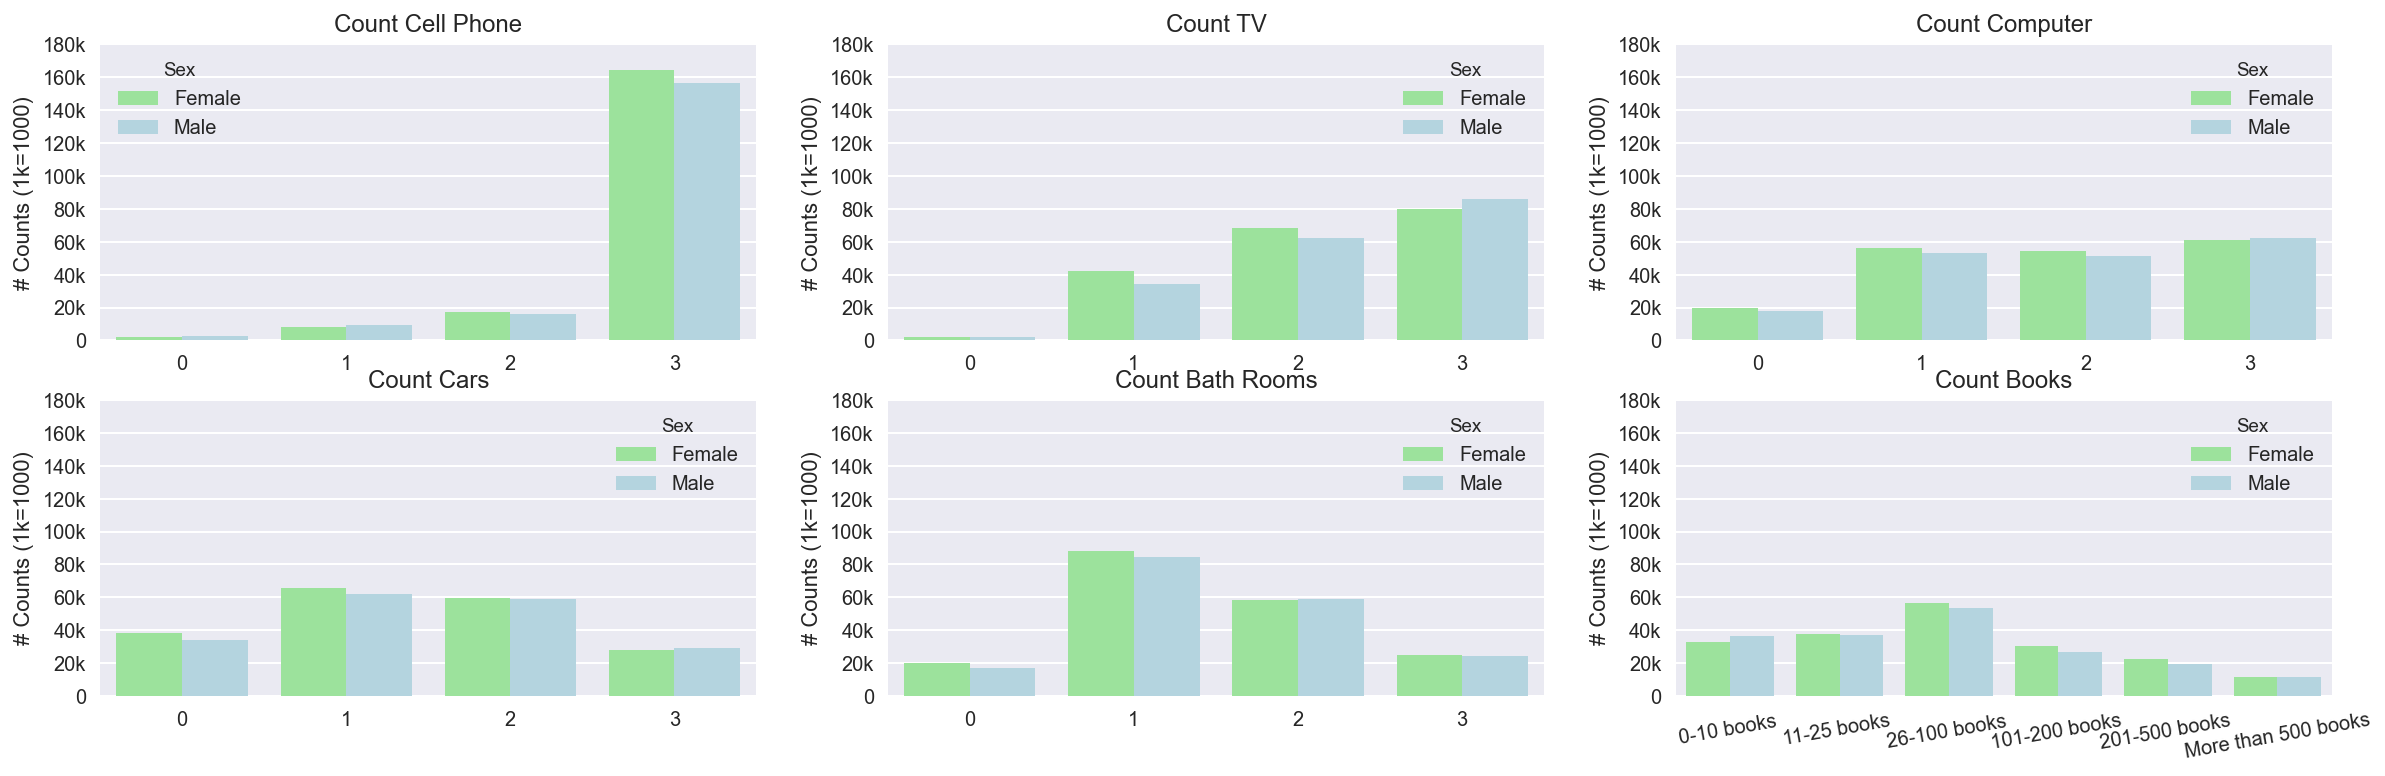

In [26]:
counts = ['Count_Cell_Phone', 'Count_TV',
          'Count_Computer', 'Count_Cars', 
          'Count_Bath_Rooms', 'Count_Books']


fig = plt.figure(figsize=(20,6))

axes = []
nrows = 2
ncols = 3

for idx, col in enumerate(counts):
    axes.append(fig.add_subplot(nrows, ncols, idx+1))
    
    if col != "Count_Books":
        sns.countplot(data=pisa, x=col, hue="Sex", palette=["lightgreen", "lightblue"], order=[0,1,2,3])
    else:
        sns.countplot(data=pisa, x=col, hue="Sex", palette=["lightgreen", "lightblue"])
        plt.xticks(rotation = 10)

    plt.yticks([x for x in np.arange(0, 200000, 20000)], ["{}k".format(str(x)[:-3]) if x!=0 else str(x) for x in np.arange(0, 200000, 20000)]);
    plt.title(col.replace("_", " "))
    plt.ylabel("# Counts (1k=1000)")
    plt.xlabel(None)

> `Key findings` 
Same accounts for the number of cars, TVs, phones etc at home. They are almost equally distributed amongst girls and boys. Cell Phones peak at 3 or more at home, so do TVs. On average, most students have between 26 and 100 books at home, with very few owning more than 500. Overall for most of the items, it appears they tend to be normally distributed (although we do not have a large "bin size" on the x-axis).

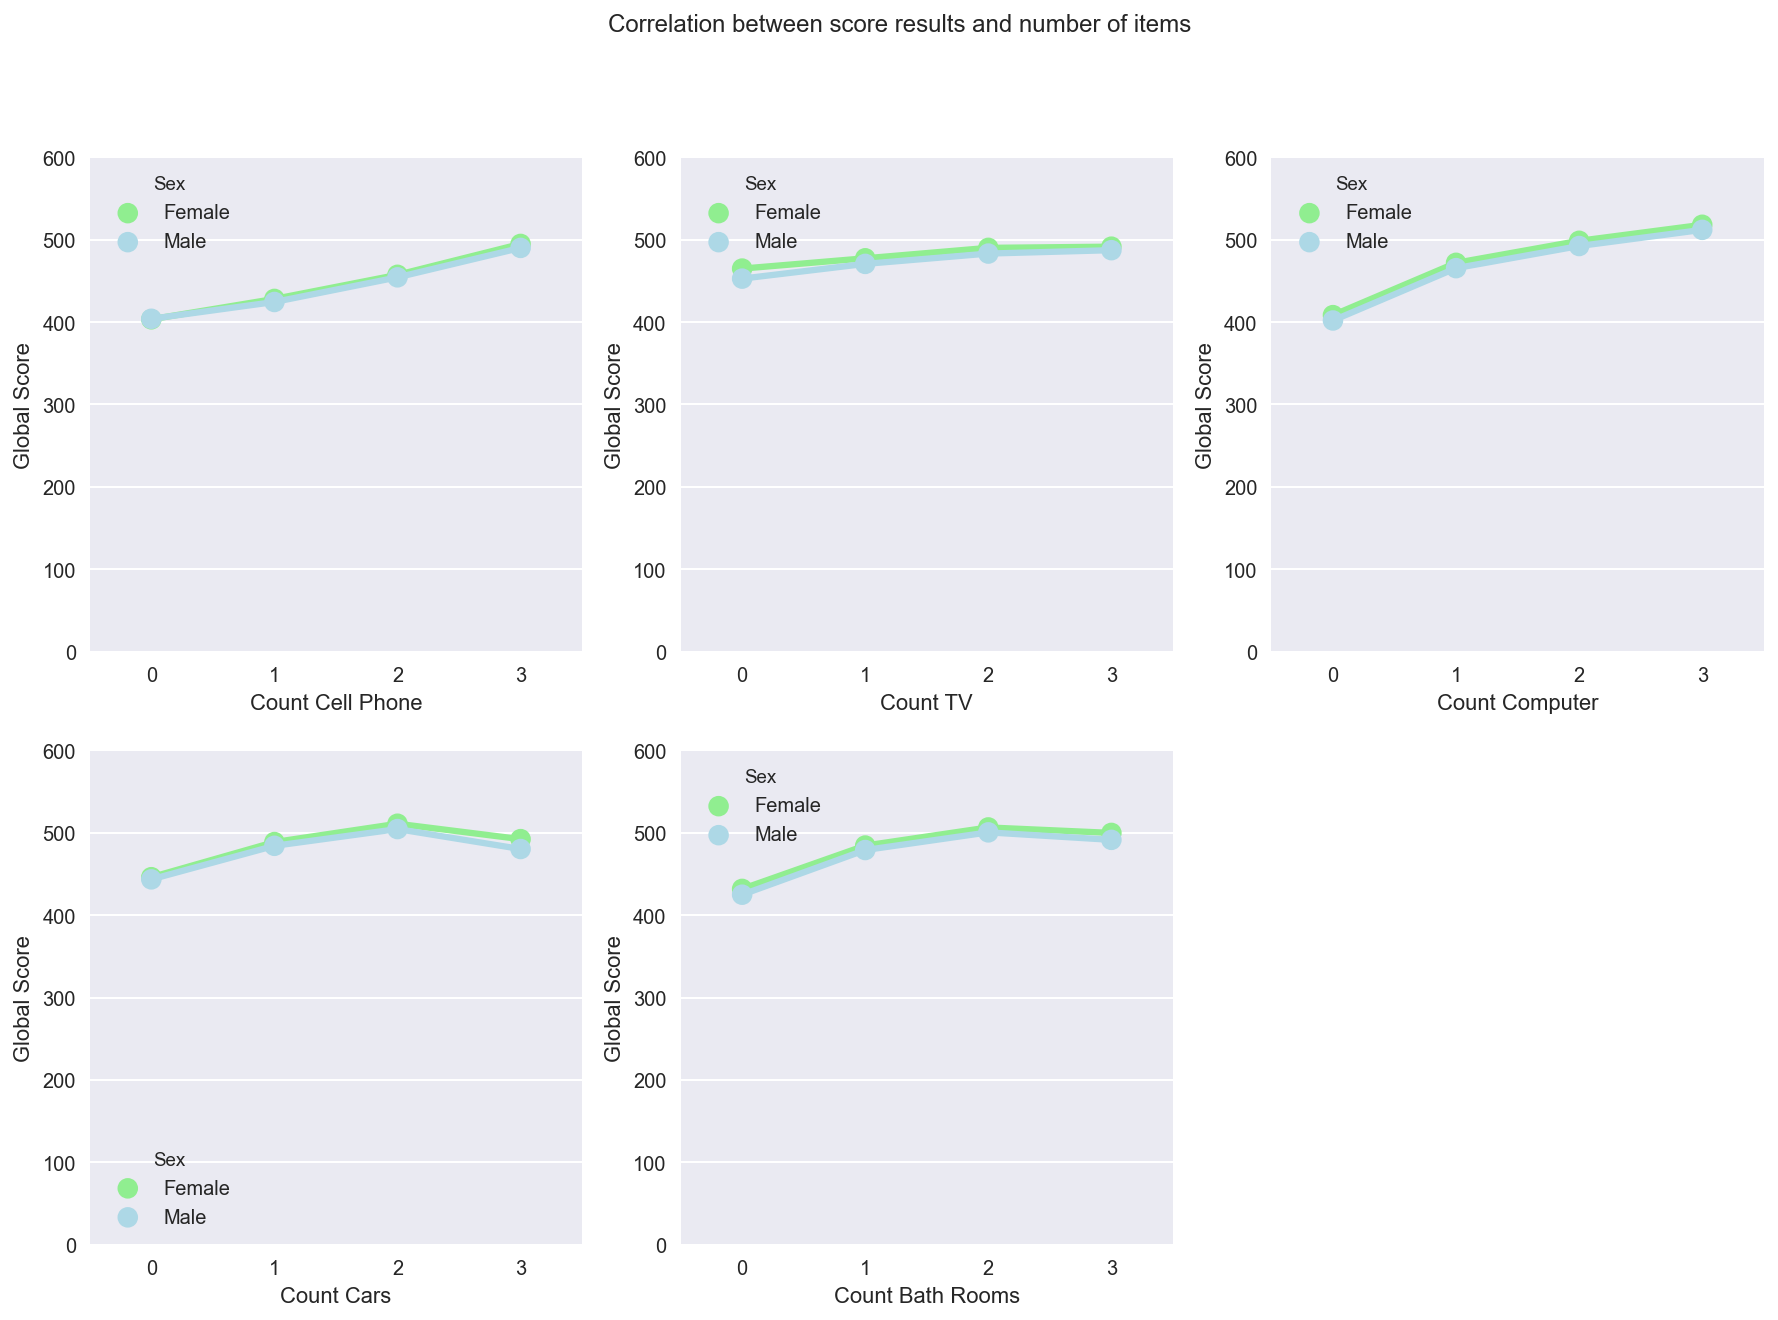

In [27]:
# Now use a lineplot (sns.pointplot) to investigate the relationship between the number of luxury items at home and a students PISA 2012 test performance.

fig = plt.figure(figsize=(15,10))

nrows = 2
ncols = 3
axes = []

for idx, col in enumerate(counts[:-1]):
    axes.append(fig.add_subplot(nrows, ncols, idx+1))
    sns.pointplot(data=pisa, x=col, y="global_score", hue="Sex", palette=["lightgreen", "lightblue"]);
    if col == "Count_Books":
        plt.xticks(rotation = 10);
    plt.ylim([0, 600]);
    plt.xlabel(col.replace("_", " "))
    plt.ylabel("Global Score")
plt.suptitle("Correlation between score results and number of items");

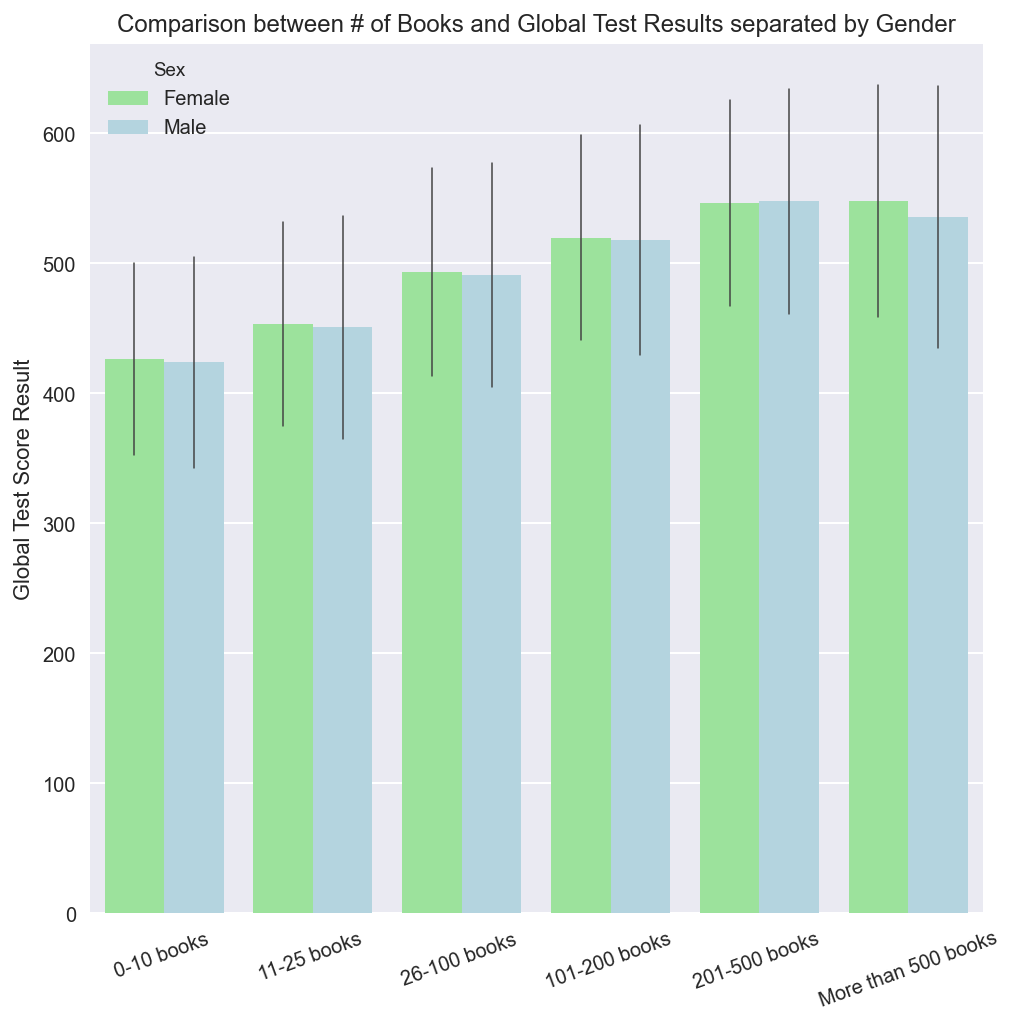

In [28]:
# repeat the same in a barchart for the number of books that are at home

plt.figure(figsize=(8,8))
sns.barplot(data=pisa, x="Count_Books", y="global_score", palette=["lightgreen", "lightblue"], ci="sd", hue="Sex", errwidth = 0.75);
plt.xlabel(None);
plt.xticks(rotation=20)
plt.ylabel("Global Test Score Result");
plt.title("Comparison between # of Books and Global Test Results separated by Gender");
plt.savefig("Books_Global_Scores.png")

> `Key findings` 
The above two plots are the most compelling and also surprising results I found when investigating the PISA 2012 dataset. Almost all of the shown items trend to correlate with the global PISA survey scores. While for the number of books, this might be kind of obvios as whatever domain these books belong to, books have always been a source of knowledge and might help get better test results. Also access to a computer appears appropriate to correlate with higher PISA test results. Many students use a computer as a modern source for education. What was however most confusing at first is that there also appears to be a linear correlation between the number of cars and the number of bathrooms a family has at home with the result of their childrens survey. This however might be a bias. Familys having three or more cars or three or more bathrooms might have more money at all. Sadly, education around the world still is an issue of money, so poorer kids might have less access to educational resources like computer, expensive school books and in some regions of the world to education, school etc at all. Thus bathrooms and number of cars will most likely be a kind of bias towards the performance of a kid in the PISA challenge.

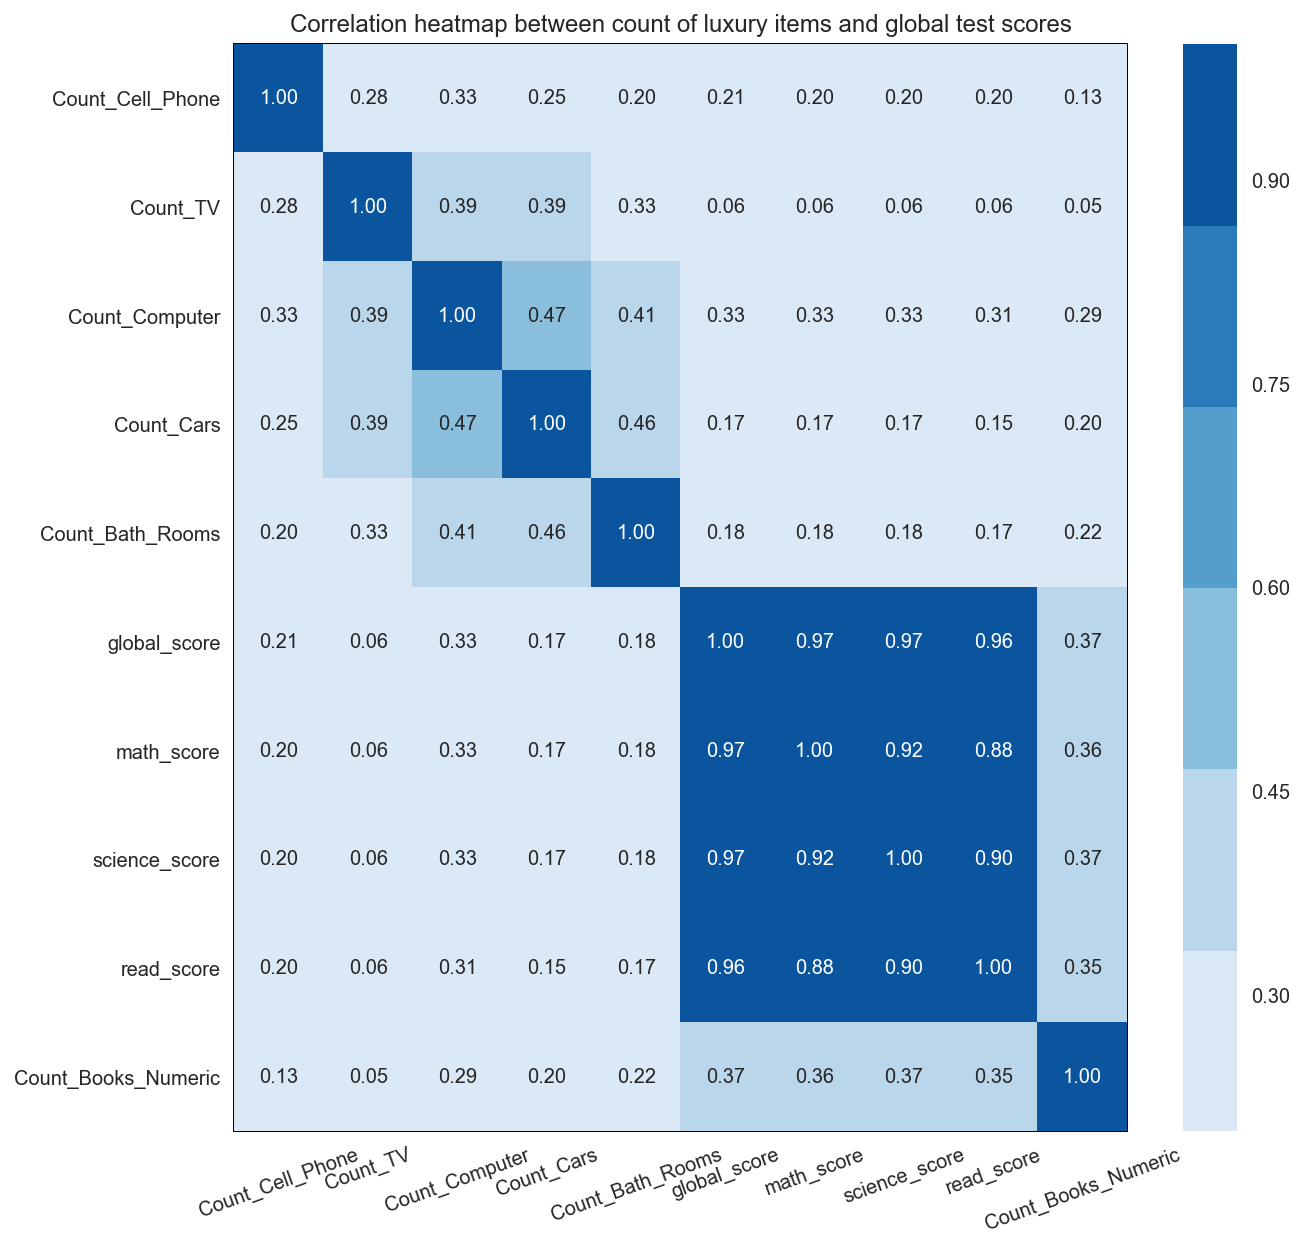

In [29]:
# quickly create a heatmap to explore more relationships
# in case there is some interesting correlation between items we might have misses so far
# however, apart from seeing that the different disciplines (reading, math, science) correlate between each other,
# the highest correlation value i for the test results and the number of books a student owns (0.35-0.37 approximately)

variables = ['Count_Cell_Phone', 'Count_TV', 'Count_Computer',
             'Count_Cars', 'Count_Bath_Rooms', 'Count_Books',
             'global_score', 'math_score', 'science_score',
             'read_score']

pisa["Count_Books_Numeric"] = pisa["Count_Books"].replace({"0-10 books ": np.mean((0,10)),
                                 "11-25 books ": np.mean((11,25)),
                                 "26-100 books ": np.mean((26,100)),
                                 "101-200 books ": np.mean((101,200)),
                                 "201-500 books ": np.mean((201,500)),
                                 "More than 500 books": 501})
variables.append("Count_Books_Numeric")

palette = sns.color_palette("Blues")
plt.figure(figsize=(10,10))
fig = sns.heatmap(pisa[variables].corr(),
           cmap=palette, annot=True, fmt=".2f", vmin=0.2);
fig.patch.set_edgecolor("black");
fig.patch.set_linewidth("1");
plt.title("Correlation heatmap between count of luxury items and global test scores");
plt.xticks(rotation = 20);

## Research question 2:
`2. Is beeing late for school and skipping school lessons bad for your test performance ?`  


This question can be answered easily. All the data is available in the truancy columns. Just simply set up a boxplot (see if boys are lazier than girls by seperating for gender) and compare the test statistics.

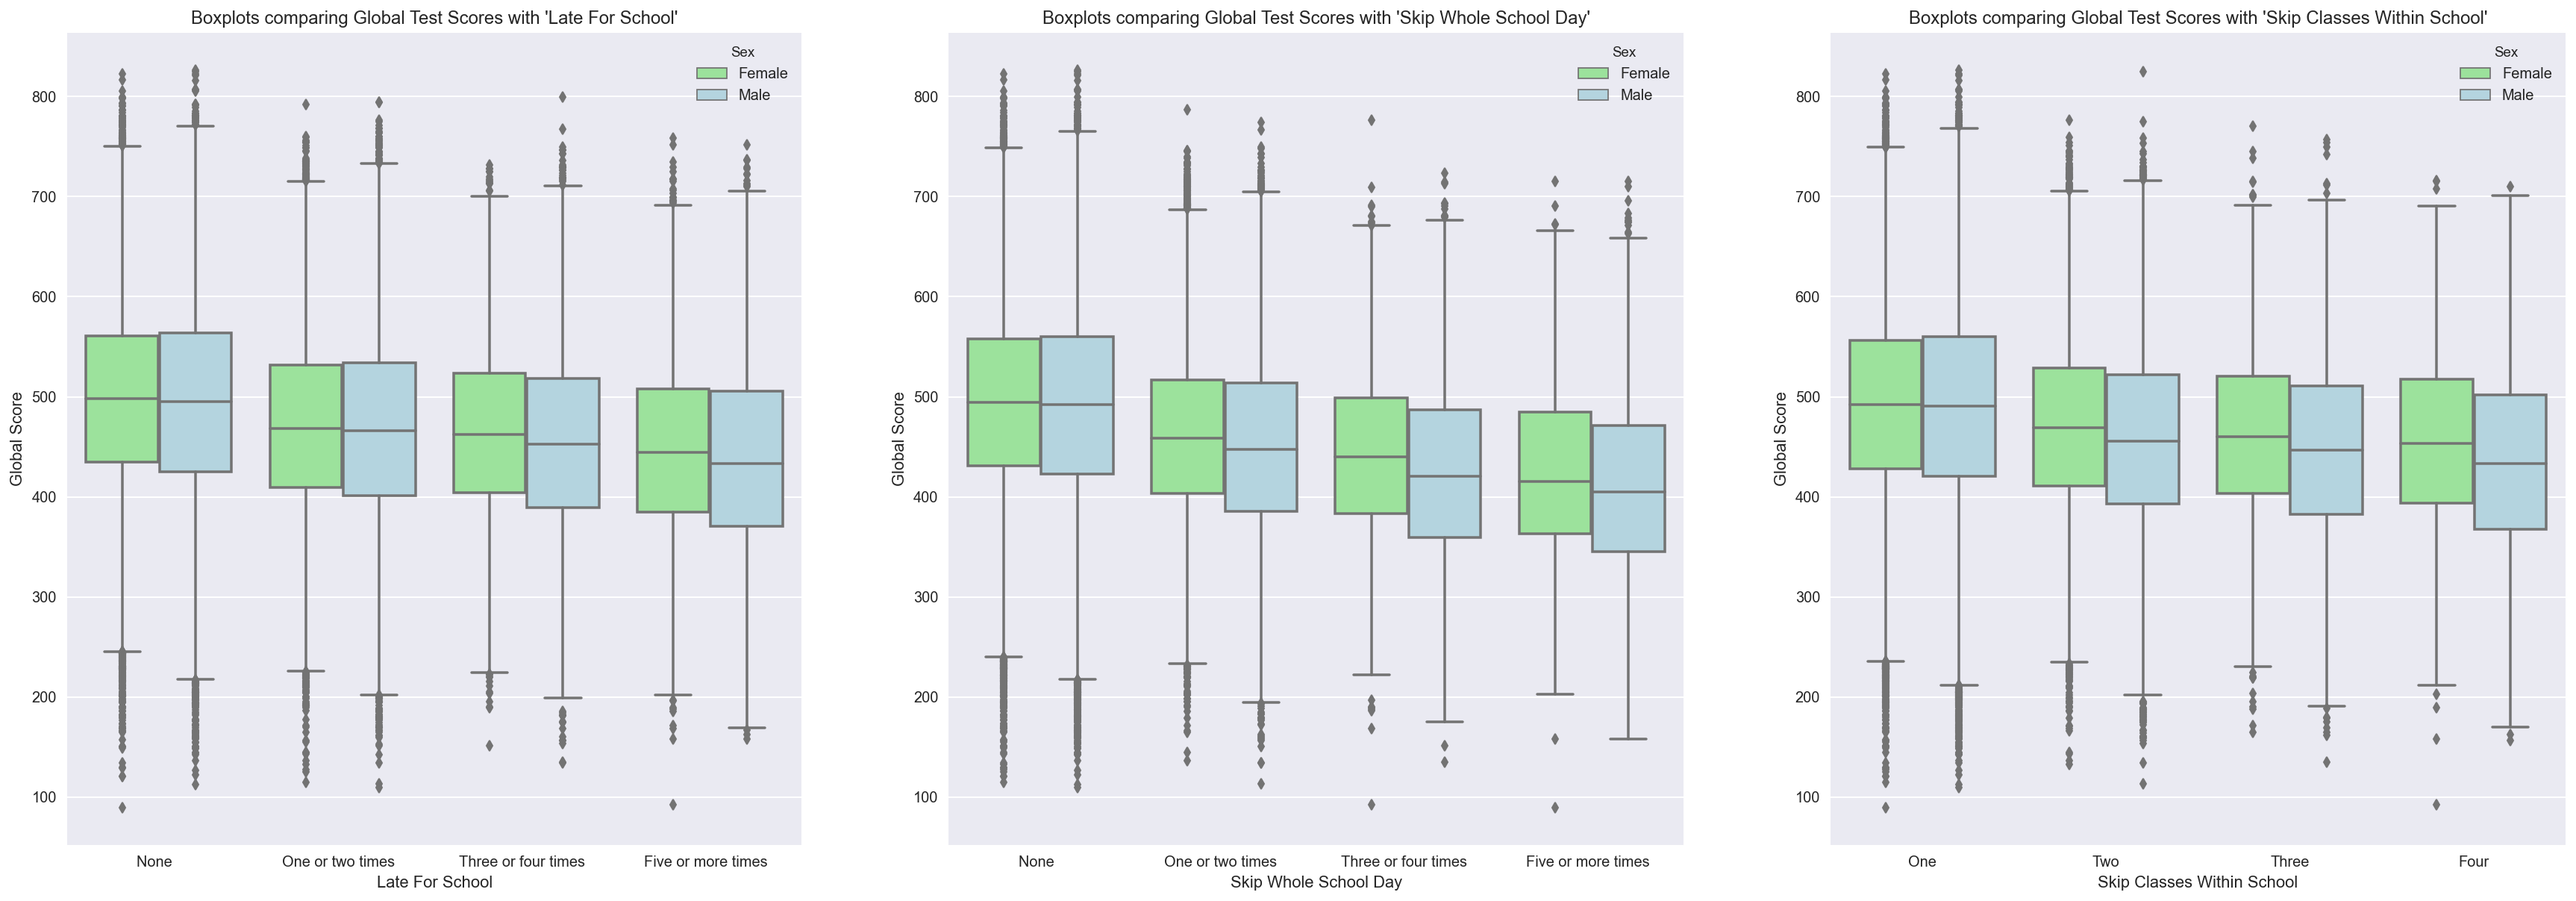

In [30]:
truancy = ['Late_For_School', 'Skip_Whole_School_Day',
           'Skip_Classes_Within_School']

axes = []
nrows = 1
ncols = 3

fig = plt.figure(figsize=(30,10))

for idx, col in enumerate(truancy):
    axes.append(fig.add_subplot(nrows, ncols, idx+1))
    plt.title("Boxplots comparing Global Test Scores with '{}'".format(col.replace("_", " ")))
    sns.boxplot(data=pisa, x=col, y="global_score", hue="Sex", palette=["lightgreen", "lightblue"])
    plt.xlabel(col.replace("_", " "))
    plt.ylabel("Global Score")
    if idx == 2:
        plt.xticks([0,1,2,3], ["One", "Two", "Three", "Four"])

> `Key findings` 
The three boxplots above show the relationship between kids beeing late for school, skipping whole school days a couple of times or classes at all with their global PISA test results. Not surprisingly, independently of gender, the more often kids are late for school or the more school days they skip, the worse their results get.
Additionally we can see that for almost any category, girls still fall into achieving a better score than boys (see the horizontal line for median). This trend is even more stricking among all three plots for those who most frequently are late of miss school most often. 

## Research question 3:
`(3. Additional) What countries perform best ? How is Germany performing ? Is it as bad as we think ?`  


In [31]:
# First create a statistics table, then use the order of countries by the median of the overall scores to sort them and plot the top 10 countries. 
# Then lets check if Germany makes it into them ...
grouped = pisa.groupby("Country_Code")[["global_score", "math_score", "read_score", "science_score"]]
grouped.agg(["mean", "median", "std"])

global_score                         math_score  \
                                 mean      median        std        mean   
Country_Code                                                               
Albania                    396.719697  402.147420  88.274916  394.746217   
Argentina                  423.856345  424.375733  76.155280  414.185621   
Australia                  518.475032  520.304827  89.423959  509.388404   
Austria                    513.621297  517.820480  80.648121  518.007550   
Belgium                    531.051761  538.807393  87.886315  536.355786   
...                               ...         ...        ...         ...   
United Arab Emirates       451.424692  450.619887  84.070116  444.163179   
United Kingdom             515.292547  516.633207  81.721482  505.232681   
United States of America   502.147153  501.351153  83.687967  490.746849   
Uruguay                    438.225009  436.649613  77.878517  434.493752   
Vietnam                    520.961851  522.245867  68.807115  516.692616   

                                                read_score             \
                             median        std        mean     median   
Country_Code                                                            
Albania                   396.17542  85.389452  396.190101  402.35768   
Argentina                 413.85730  72.958209  426.301706  429.56686   
Australia                 508.73188  91.602060  518.052115  522.26286   
Austria                   518.70232  85.515841  503.654768  510.25940   
Belgium                   540.82410  93.399068  529.778358  538.54620   
...                             ...        ...         ...        ...   
United Arab Emirates      439.25066  84.651005  451.764182  455.32614   
United Kingdom            504.75932  83.637721  514.252312  516.70266   
United States of America  487.15530  85.151639  508.367090  510.74058   
Uruguay                   431.30550  79.738619  437.178559  436.72102   
Vietnam                   515.35286  79.945191  513.332775  516.19381   

                                     science_score                        
                                 std          mean     median        std  
Country_Code                                                              
Albania                   103.826415    399.222773  404.45731  89.336969  
Argentina                  88.441046    431.081708  432.15218  79.080046  
Australia                  90.728018    527.984576  531.08914  94.427579  
Austria                    82.312440    519.201573  523.44276  83.436392  
Belgium                    90.261947    527.021139  535.75158  89.969356  
...                              ...           ...        ...        ...  
United Arab Emirates       89.009762    458.346714  456.49012  87.750394  
United Kingdom             82.270576    526.392648  527.91870  86.684422  
United States of America   84.470386    507.327520  508.14994  87.946118  
Uruguay                    82.220391    443.002715  443.24880  83.409308  
Vietnam                    66.161097    532.860162  535.47182  70.729529  

[67 rows x 12 columns]

>`Key findings`
Not unexpectedly the top students come from regions in China. My country (Germany) however isn't that bad as always considered by ourselves, beeing represented in the top 10 in all three domains.

In [32]:
# create a top10_ranking to plot for the explanatory data viz later

top10_ranking = pisa.groupby("Country_Code")["global_score"].median().sort_values(ascending=False).index[:10]
top10_ranking

Index(['China-Shanghai', 'Hong Kong-China', 'Singapore', 'Japan', 'Korea',
       'Chinese Taipei', 'Germany', 'Liechtenstein', 'Belgium', 'New Zealand'],
      dtype='object', name='Country_Code')

In [33]:
# now subset the dataframe
top10 = pisa[pisa.Country_Code.isin(top10_ranking)]
top10.shape

(41597, 62)

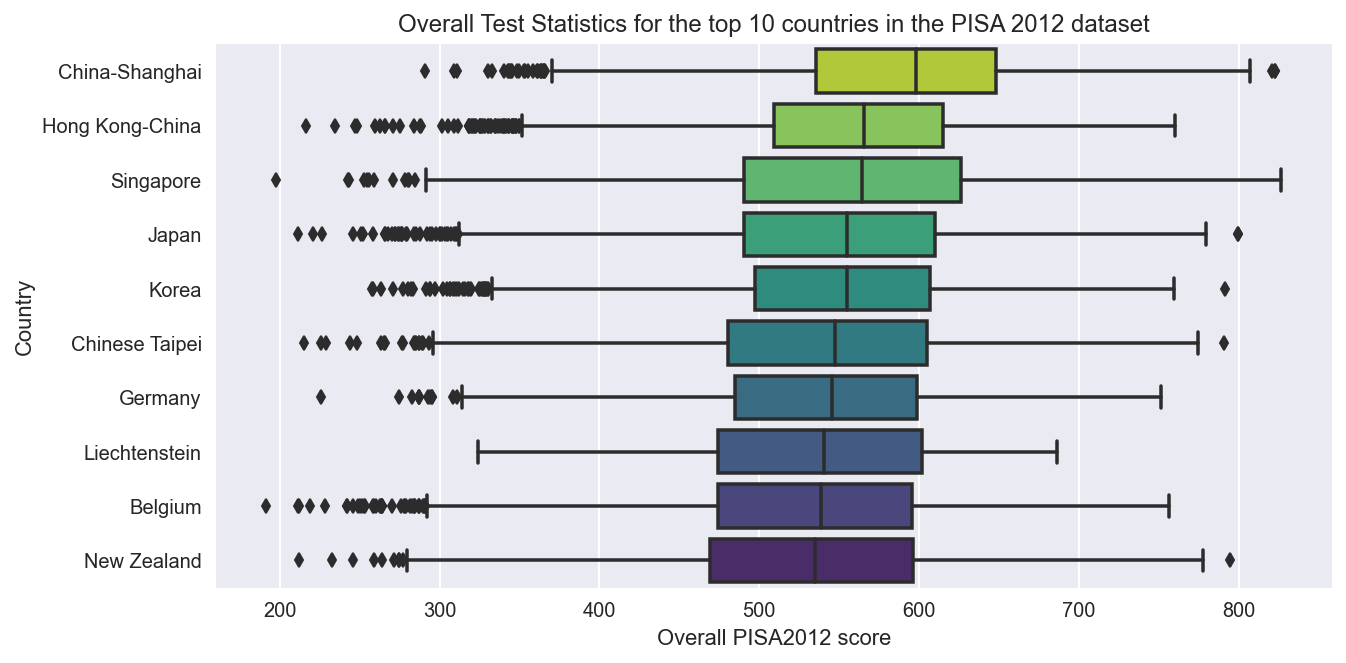

In [34]:
# visualise the top 10 countries

plt.figure(figsize=(10,5));

plt.title("Overall Test Statistics for the top 10 countries in the PISA 2012 dataset")
sns.boxplot(data=top10, y="Country_Code", x="global_score", order=top10_ranking, palette="viridis_r");
plt.ylabel("Country")
plt.xlabel("Overall PISA2012 score")
plt.savefig("Top_10_countries.png")

> `Key findings` 
Luckily, Germany made it into the top10, even as number one country from Europe, followed by Liechtenstein and Belgium (our close neighbours). The top performing countries however (not unexpectedly) are from the asian region.

## Summary

> **In this notebook we investigated the role of possessing items like a lot of cars, books etc at home on the overall score kids achieve in the PISA 2012 survey. We found out that**
1. ... the better the financial situation at home appears, reflected by the number of cars they have in their garage or the number of bathrooms in their houses, the more likely it is that this  correlates with a better performance in the test. This is an important insight, because it might still show that in the year 2012 educational fitness is still a matter of money. Some third world countries performed especially bad in this survey (data not shown), while highly developped countries like Germany and Taiwan perform overall better ...

## Summary
> 1. ... Especially modern media like the access to computers and the internet appears to be quite important on the test results (cave: we did not perform any statistics, so we should not conclude a direction of the correlation, but I just do it here intuitively), while number of cars or bath rooms is most likely to some kind of bias (bystander effect) reflecting the overall economical situation at home. Therefore, guaranteeing  access to a computer seems to be important in the future to provide same chances for everyone irrespective of the financial situation at home.

## Summary

> **In this notebook we investigated the role of possessing items like a lot of cars, books etc at home on the overall score kids achieve in the PISA 2012 survey. We found out that**
> 2. ... the more often kids skip school days, skip lessons, the more likely it is that they will perform worse than their classmates that never skip lessons or are late for school. This trend is especially stricking for boys, while girls that skip the same amount of lessons or are as frequently late in the morning perform still a lot better. 
> 3. ... the smartest students come from the asian region (especially China) but also that we in Germany do not perform so bad at all, as we would always consider.

# Convert to slide deck

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [ ]:
!jupyter nbconvert Explanatory_Data_Analysis.ipynb --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook Explanatory_Data_Analysis.ipynb to slides
[NbConvertApp] Writing 823444 bytes to Explanatory_Data_Analysis.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Explanatory_Data_Analysis.slides.html
Use Control-C to stop this server
